<a href="https://colab.research.google.com/github/brunocgf/CertificationUT_DS/blob/master/%5CStatistics4DS%5CCreditCardApprovalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Loading Data

In [ ]:
# I use this library to download the data in the working instance, 
# but you need the kaggle api token
# Don't forget to run the first line to install the library
# {"username":"brvnocgf","key":"acfc3a5fef0431af9200fa9335f9bbc6"}
od.download('https://www.kaggle.com/rikdifos/credit-card-approval-prediction')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: brvnocgf
Your Kaggle Key: ··········


100%|██████████| 5.32M/5.32M [00:00<00:00, 50.7MB/s]

In [ ]:
data_path = "./credit-card-approval-prediction/application_record.csv"

In [ ]:
df_application = pd.read_csv(data_path, header = 0, sep = ',')
df_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df_application.isnull().values.any()

True

There's no missing values on the data

In [ ]:
data_path = "./credit-card-approval-prediction/credit_record.csv"
df_credit = pd.read_csv(data_path, header = 0, sep = ',')
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df_credit['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [ ]:
df_credit['STATUS'].nunique()

8

In [ ]:
df_credit.groupby('ID')['STATUS'].nunique().plot.bar()

In [ ]:
+-# CONVERSION OF AGE ATTRIBUTE DATA FROM DAYS TO YEARS

We convert the age atrubute from days to years.

In [ ]:
cardio['age_years'] = cardio['age'].apply(lambda x: x/365).round(2)
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87


We drop the id columns

In [ ]:
cardio.drop(columns = 'id', axis = 1, inplace = True)
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87


In [ ]:
cardio.describe(include = 'all')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.339349
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.759573
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.580000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.390000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.980000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.430000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.970000


In [ ]:
cardio.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

# 2. Correlation Analysis

In [ ]:
numerical_data = cardio[['age_years', 'height','weight', 'ap_hi', 'ap_lo']]
cardio_corr = numerical_data.corr(method = 'spearman')
cardio_corr

,age_years,height,weight,ap_hi,ap_lo
age_years,1.000000,-0.082292,0.061555,0.219086,0.156697
height,-0.082292,1.000000,0.313569,0.019381,0.030534
weight,0.061555,0.313569,1.000000,0.277749,0.254420
ap_hi,0.219086,0.019381,0.277749,1.000000,0.735436
ap_lo,0.156697,0.030534,0.254420,0.735436,1.000000


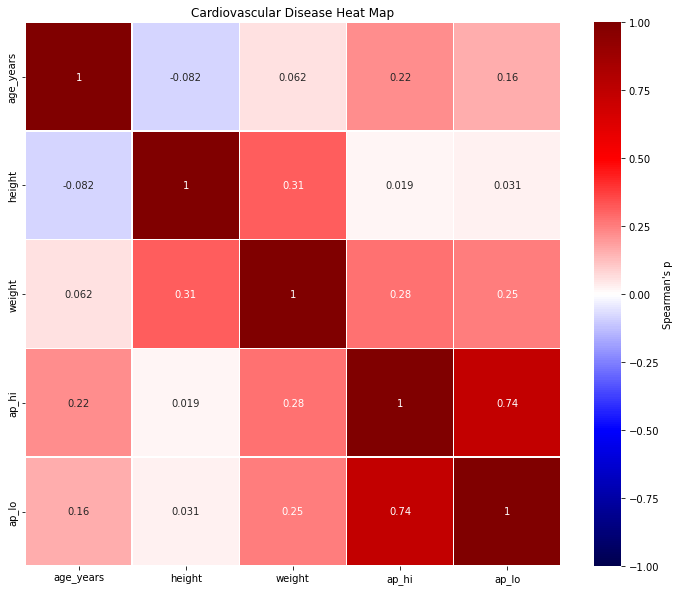

In [ ]:
plt.figure(figsize = (12,10))
ax = sns.heatmap(cardio_corr, cmap = 'seismic', annot = True, linewidth = 0.5, cbar_kws = {'label': "Spearman's p"}, vmin=-1, vmax=1)
ax.set_title('Cardiovascular Disease Heat Map');

The correlation between height and weight is positive, which is expected, but weak suggesting that diverse body types are represented by this data. The correlation between systolic and diastolic blood pressure is strong and positive which is also expected. Factors which will cause increases in pressure (such as plaque formation) usually affect both.

In [ ]:
grouped = cardio.groupby('cardio')
grouped.aggregate(np.mean)[['age_years', 'height','weight', 'ap_hi', 'ap_lo']]

,age_years,height,weight,ap_hi,ap_lo
cardio,,,,,
0,51.730471,164.448017,71.592150,120.432598,84.251763
1,54.950158,164.270334,76.822368,137.212042,109.023929


The mean values between the two groups are generally quite similar. The exceptions are systolic and diastolic blood pressure, which are significantly higher for those with cardiovascular disease.